### Text Processing and Analysis using NLTK library ###



In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
# sent_tokenize is used to split the text into sentences
# word_tokenize is used to split the text into words

print(f"The NLTK version is: {nltk.__version__}")

The NLTK version is: 3.8.1


### Tokenizing ###

In [2]:
# Quote from the sci-fi book "Dune"

text_string = """Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult."""

In [3]:
print(sent_tokenize(text_string)) # Split the text into sentences

["Muad'Dib learned rapidly because his first training was in how to learn.", 'And the first lesson of all was the basic trust that he could learn.', "It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult."]


In [4]:
print(word_tokenize(text_string), end=' ') # Split the text into words

["Muad'Dib", 'learned', 'rapidly', 'because', 'his', 'first', 'training', 'was', 'in', 'how', 'to', 'learn', '.', 'And', 'the', 'first', 'lesson', 'of', 'all', 'was', 'the', 'basic', 'trust', 'that', 'he', 'could', 'learn', '.', 'It', "'s", 'shocking', 'to', 'find', 'how', 'many', 'people', 'do', 'not', 'believe', 'they', 'can', 'learn', ',', 'and', 'how', 'many', 'more', 'believe', 'learning', 'to', 'be', 'difficult', '.'] 

### Stopwords ###

In [8]:
from nltk.corpus import stopwords # nltk.download("stopwords") to download the stopwords

In [6]:
word_quote = "10. Sir, I protest. I sir, am not a merry man!" # Quote from Star Trek: The Next Generation
words_in_quote = word_tokenize(word_quote.lower()) # Tokenize and convert to lower case (to avoid same word being added to the vocabulary)
print(words_in_quote) # Print the words in the quote

['10.', 'sir', ',', 'i', 'protest', '.', 'i', 'sir', ',', 'am', 'not', 'a', 'merry', 'man', '!']


In [9]:
stop_words = set(stopwords.words("english")) # Get the stop words in English

In [10]:
filtered_list = [word for word in words_in_quote if word.lower() not in stop_words] # Filter out the stop words
print(filtered_list) # Print the words in the quote that are not stop words

['10.', 'sir', ',', 'protest', '.', 'sir', ',', 'merry', 'man', '!']


In [11]:
# If you want to remove the punctuations  and keep only alphanumeric content
filtered_list = [w for w in filtered_list if w.isalnum()] # Filter out the punctuations, where we only get alphanumeric content
print(filtered_list) # Print the alphanumeric words in the quote (10 still gets removed because it has a period)
filtered_list = [w for w in filtered_list if w.isalpha()] # If you want to remove the numbers too  and keep only alphabetic content
print(filtered_list) # Print the alphabetic words in the quote

['sir', 'protest', 'sir', 'merry', 'man']
['sir', 'protest', 'sir', 'merry', 'man']


### Stemming ###

In [12]:
from nltk.stem import PorterStemmer # Stemming is the process of reducing a word to its word stem

In [13]:
stemmer = PorterStemmer() # Create a stemmer object

In [14]:
string_for_stemming = """The crew of the USS Discovery discovered many discoveries.
Discovering is what explorers do.""" # A string with words that have the same root word

In [15]:
words = word_tokenize(string_for_stemming) # Tokenize the string by words
print(words) # Print the words in the string

['The', 'crew', 'of', 'the', 'USS', 'Discovery', 'discovered', 'many', 'discoveries', '.', 'Discovering', 'is', 'what', 'explorers', 'do', '.']


In [16]:
stemmed_words = [stemmer.stem(word) for word in words] # Stem the words in the string
print(stemmed_words) # Print the stemmed words
# Con of Stemming: Might work for text classification problems, but not for others like text generation problems

['the', 'crew', 'of', 'the', 'uss', 'discoveri', 'discov', 'mani', 'discoveri', '.', 'discov', 'is', 'what', 'explor', 'do', '.']


<u>Original word 	 &emsp;Stemmed version</u><br>
'Discovery' 	 &emsp;   'discoveri'<br>
'discovered' 	 &emsp;   'discov'<br>
'discoveries' 	 &emsp;   'discoveri'<br>
'Discovering' 	 &emsp;   'discov'<br><br>
#### Understemming and overstemming are two ways stemming can go wrong: ####

    Understemming happens when two related words should be reduced to the same stem but aren’t. This is a false negative.
    
    Overstemming happens when two unrelated words are reduced to the same stem even though they shouldn’t be. This is a false positive.


### Tagging Parts of Speech ###

Part of speech is a grammatical term that deals with the roles words play when you use them together in sentences.<br> Tagging parts of speech, or POS tagging, is the task of labeling the words in your text according to their part of speech.

In [17]:
sagan_quote = """If you wish to make an apple pie from scratch, you must first invent the universe."""
words_in_sagan_quote = word_tokenize(sagan_quote)
print(words_in_sagan_quote)

['If', 'you', 'wish', 'to', 'make', 'an', 'apple', 'pie', 'from', 'scratch', ',', 'you', 'must', 'first', 'invent', 'the', 'universe', '.']


In [18]:
#nltk.download('averaged_perceptron_tagger')

nltk.pos_tag(words_in_sagan_quote) # Part of speech tagging

[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]


    'pie' was tagged NN because it’s a singular noun.
    'you' was tagged PRP because it’s a personal pronoun.
    'invent' was tagged VB because it’s the base form of a verb.


### Lemmatization ###

In [19]:
#nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer # Lemmatization is the process of deriving a word to its base or root form

In [20]:
lemmatizer = WordNetLemmatizer() # Create a lemmatizer object

In [21]:
string_for_lemmatizing = "The friends of DeSoto love scarves." # A string with words that have the same root word
words = word_tokenize(string_for_lemmatizing) # Tokenize the string by words

In [23]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in words] # Lemmatize the words in the string
print(lemmatized_words) # Print the lemmatized words
# Here, the lemmatizer does better than the stemmer

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']


That looks right. The plurals 'friends' and 'scarves' became the singulars 'friend' and 'scarf'.

In [24]:
# But what would happen if you lemmatized a word that looked very different from its lemma? Try lemmatizing "worst":

lemmatizer.lemmatize("worst")

#You got the result 'worst' because lemmatizer.lemmatize() assumed that "worst" was a noun. 
#You can make it clear that you want "worst" to be an adjective:

'worst'

In [25]:
lemmatizer.lemmatize("worst", pos="a") # POS tagging as adjective
# Now lemmatizer.lemmatize() knows that "worst" is an adjective and returns "bad" as the lemma

'bad'

### Chunking ###
While tokenizing allows you to identify words and sentences, chunking allows you to identify phrases.

In [26]:
lotr_quote = "It's a dangerous business, Frodo, going out your door." # Quote from The Lord of the Rings

In [27]:
words_in_lotr_quote = word_tokenize(lotr_quote) # Tokenize the words in the quote

In [28]:
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote) # Tag pos of all the words

 In order to chunk, you first need to define a chunk grammar.<br>
 A chunk grammar is a combination of rules on how sentences should be chunked. It often uses regular expressions, or regexes.

Regular expressions come in handy if you want to process text.

In [29]:
grammar = "NP: {<DT>?<JJ>*<NN>}"   # NP stands for Noun Phrase Chunking, DT: Determiner, JJ: Adjective, NN: Noun

According to the rule you created, your chunks:

    Start with an optional (?) determiner ('DT')
    Can have any number (*) of adjectives (JJ)
    End with a noun (<NN>)

Create a chunk parser with this grammar:



In [30]:
chunk_parser = nltk.RegexpParser(grammar) # Create a chunk parser

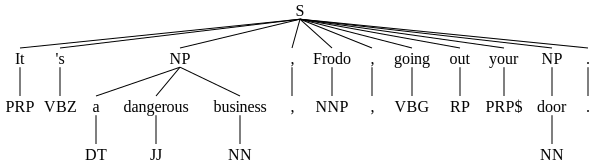

In [32]:
tree = chunk_parser.parse(lotr_pos_tags) # Parse the pos tags
tree # Print the tree

You got two noun phrases:

    'a dangerous business' has a determiner, an adjective, and a noun.
    'door' has just a noun.

Now that you know about chunking, it’s time to look at chinking.

### Chinking ###

Chinking is used together with chunking, but while chunking is used to include a pattern, chinking is used to exclude a pattern.

In [33]:
#The first rule of your grammar is {<.*>+}. 
#This rule has curly braces that face inward ({}) because it’s used to determine what patterns you want to include in you chunks. 
#In this case, you want to include everything: <.*>+.

#The second rule of your grammar is }<JJ>{. 
#This rule has curly braces that face outward (}{) because it’s used to determine what patterns you want to exclude in your chunks. 
#In this case, you want to exclude adjectives: <JJ>. 

grammar = """
... Chunk: {<.*>+}
... Chunk: }<JJ>{"""

In [30]:
chunk_parser = nltk.RegexpParser(grammar) # Create a chunk parser

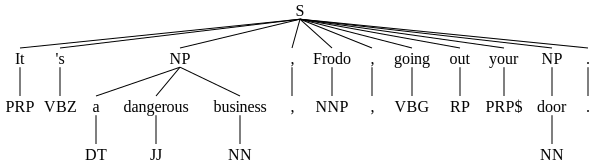

In [34]:
tree = chunk_parser.parse(lotr_pos_tags) # Parse the pos tags
tree # Print the tree

### Using Named Entity Recognition (NER) ###
Named entities are noun phrases that refer to specific locations, people, organizations, and so on. With named entity recognition, you can find the named entities in your texts and also determine what kind of named entity they are.

In [35]:
#nltk.download("words")

quote = """
... Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
... for countless centuries Mars has been the star of war—but failed to
... interpret the fluctuating appearances of the markings they mapped so well.
... All that time the Martians must have been getting ready.
...
... During the opposition of 1894 a great light was seen on the illuminated
... part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
... and then by other observers. English readers heard of it first in the
... issue of Nature dated August 2."""

In [36]:
def extract_ne(quote): # Extract named entities from the quote
    words = word_tokenize(quote) # Tokenize the words in the quote
    tags = nltk.pos_tag(words) # Tag the pos of the words
    tree = nltk.ne_chunk(tags, binary=True) # Create a tree of the named entities
    return set( # Return a set of the named entities
         " ".join(i[0] for i in t) # Join the words in the named entities
         for t in tree # For each named entity in the tree
         if hasattr(t, "label") and t.label() == "NE") # If the named entity has a label and the label is "NE"

In [37]:
extract_ne(quote) # Extract the named entities from the quote

{'Lick Observatory', 'Mars', 'Nature', 'Perrotin', 'Schiaparelli'}


    An institution: 'Lick Observatory'
    A planet: 'Mars'
    A publication: 'Nature'
    People: 'Perrotin', 'Schiaparelli'


### Text to Analyze ###
So far we have done some text processing tasks with small example texts. We are ready to analyze a bunch of texts at once. A group of texts is called a corpus. NLTK provides several corpora covering everything from novels hosted by Project Gutenberg to inaugural speeches by presidents of the United States.

In order to analyze texts in NLTK, you first need to import them. This requires nltk.download, which is a pretty big download

In [38]:
from nltk.book import * # Import the nltk book

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


You now have access to a few linear texts (such as Sense and Sensibility and Monty Python and the Holy Grail) as well as a few groups of texts (such as a chat corpus and a personals corpus). So please use it to practice these concepts you are learning.<br><br>Human nature is fascinating, so let’s see what we can find out by taking a closer look at the personals corpus!<br><br>This corpus is a collection of personals ads, which were an early version of online dating. If you wanted to meet someone, then you could place an ad in a newspaper and wait for other readers to respond to you. 

In [39]:
text8.concordance("honest") # Using a concordance, you can see each time a word is used, along with its immediate context. 

Displaying 22 of 22 matches:
usic , cafes , beach & c . Seeks an honest , attractive lady with a European b
ium build , Im in my early 30s . Am honest , caring , likes fishing , animals 
in my life . Looking for a caring , honest lady for friendship to relationship
call lets have a chat . GENUINE AND HONEST Hi Im 44 with a good sense of humou
d quiet nights at home . Seeking an honest , caring woman , slim or med . buil
own hair , Mid 20s , good looking , honest n / smoker . Likes movies , drives 
hip , view to rship . SWM 45 DtoE , honest , S / D , 178cm , 79kg . Clean cut 
age is 70 yrs . GSOH , easy going , honest , reliable , DtoE person . I like w
. Kids OK as I love family . Nice & honest guy . ASIAN LADY with GSOH sought b
ale , romantic , caring , sincere & honest seeks medium / slim attrac single m
ngle 47 yo romantic easy going GSOH honest reliable looking to find a friend .
man . I would like to meet a sexy , honest , reliable partner who enjoys being
3 y . o . med . build ,

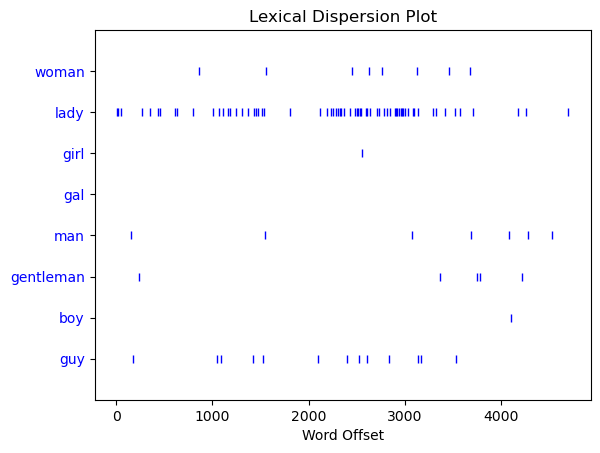

In [37]:
text8.dispersion_plot(["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"]) # Dispersion plot

Each vertical blue line represents one instance of a word. Each horizontal row of blue lines represents the corpus as a whole. This plot shows that:

    "lady" was used a lot more than "woman" or "girl". There were no instances of "gal".
    "man" and "guy" were used a similar number of times and were more common than "gentleman" or "boy".

You use a dispersion plot when you want to see where words show up in a text or corpus. If you’re analyzing a single text, this can help you see which words show up near each other. If you’re analyzing a corpus of texts that is organized chronologically, it can help you see which words were being used more or less over a period of time.

### Making a Frequency Distribution ###
With a frequency distribution, you can check which words show up most frequently in your text. 

In [38]:
from nltk import FreqDist

In [39]:
frequency_distribution = FreqDist(text8)
frequency_distribution = frequency_distribution.most_common(20)
print(frequency_distribution)

[(',', 539), ('.', 353), ('/', 110), ('for', 99), ('and', 74), ('to', 74), ('lady', 68), ('-', 66), ('seeks', 60), ('a', 52), ('with', 44), ('S', 36), ('ship', 33), ('&', 30), ('relationship', 29), ('fun', 28), ('in', 27), ('slim', 27), ('build', 27), ('o', 26)]


In [40]:
# Remove stopwords

meaningful_words = [word for word in text8 if word.casefold() not in stop_words]
frequency_distribution = FreqDist(meaningful_words)


In [41]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('slim', 27),
 ('build', 27),
 ('smoker', 23),
 ('50', 23),
 ('non', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('rship', 18)]

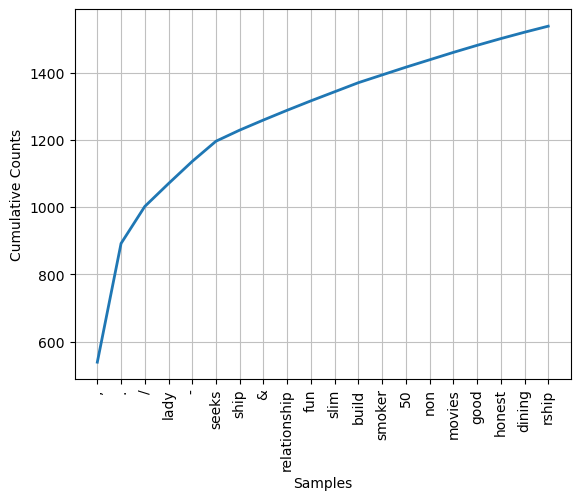

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [42]:
# Turn it into graph

frequency_distribution.plot(20, cumulative=True)


From what you’ve already learned about the people writing these personals ads, they did seem interested in honesty and used the word 'lady' a lot.<br> In addition, 'slim' and 'build' both show up the same number of times. <br>You saw slim and build used near each other when you were learning about concordances, so maybe those two words are commonly used together in this corpus. <br><br>That brings us to collocations!

### Finding Collocations ###
A collocation is a sequence of words that shows up often.<br><br>
    Example: Syntax tree\ Family tree\ Decision tree<br><br>To see pairs of words that come up often in your corpus, you need to call .collocations() on it:


In [43]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


What we have seen are a wide array of techniques and possibilities wioth the NLTK package. It is not neccessary and most likey not the case that all these are used all the time. It depends on the problem you are trying tosolve or the application you are trying to build.

As an example: If you are doing a translation task (one language to another), then, context matters. Therefore we cannot remove things like stopwords as it can change the context. <br>On the other hand, if you are building a spam classifier, we want to remove all words which do not contribute to identifying whether an email is a spam or not.

#### Sentiment analysis with NLTK Sentiment Analyzer ####

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer

# instantiate an object
sid = SentimentIntensityAnalyzer()

In [45]:
# Product review data
review = ['The product is horrible looking','The features are good']

score = [] # Empty list to store sentiment values

# Compute positive, neutral, negative and compund score for a review using the "polarity_scores" function
for r in review:
        score.append(sid.polarity_scores(r))
        print(sid.polarity_scores(r))

{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}


#### <u>What did we learn?</u> #### 

    Find text to analyze
    Preprocess your text for analysis
    Analyze your text
    Create visualizations based on your analysis
    Do sentiment analysis

We are now ready to do more NLP and text analytics
